#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**

###**Grupo 61**


##Manuel Gerardo Licera Aguirre     A00947315
##Gustavo Renne Ramos Ojeda         A01793599
##Miguel Angel Villanueva Amador    A01793890
##Julio Adrian Quintana García      A01793661
##Mario Jiménez  García             A00561170

**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [28]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import warnings
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import ColumnTransformer
from sklearn import tree

from google.colab import drive

#**Ejercicio-1.** 

In [4]:
#BOLEANO PARA REPROCESO
calculateAll = True

filename="/content/drive/MyDrive/Colab Notebooks/SouthGermanCredit.asc"

headers = {"laufkont":"status", "laufzeit":"duration", "moral":"history", "verw":"purpose", "hoehe":"amount",
     "sparkont":"savings", "beszeit":"employmentDuration", "rate":"installmentRate", "famges":"personalStatus",
     "buerge":"otherDebtors", "wohnzeit":"residence", "verm":"property", "alter":"age", "weitkred":"otherInstallments",
     "wohn":"housing","bishkred":"numberCredits", "beruf":"job", "pers":"peopleLiable", "telef":"telephone",
     "gastarb":"foreignWorker", "kredit":"creditRisk"}


drive.mount('/content/drive')

df = pd.read_csv(filename, sep="\s+")

df.rename( columns= headers, inplace=True)

df.head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,status,duration,history,purpose,amount,savings,employmentDuration,installmentRate,personalStatus,otherDebtors,...,property,age,otherInstallments,housing,numberCredits,job,peopleLiable,telephone,foreignWorker,creditRisk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


#**Ejercicio-2.**

In [5]:
# Diviendo el set de datos para entrenamiento y validación
X = df.iloc[:,0:20]
Y = df.iloc[:, -1]
Xtrain, Xtest, yTrain, yTest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=10)

#**Ejercicio-3.**

In [6]:
# Obteniendo la interpretación de los tipos para las columnas del set de datos
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 933 to 260
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   status              850 non-null    int64
 1   duration            850 non-null    int64
 2   history             850 non-null    int64
 3   purpose             850 non-null    int64
 4   amount              850 non-null    int64
 5   savings             850 non-null    int64
 6   employmentDuration  850 non-null    int64
 7   installmentRate     850 non-null    int64
 8   personalStatus      850 non-null    int64
 9   otherDebtors        850 non-null    int64
 10  residence           850 non-null    int64
 11  property            850 non-null    int64
 12  age                 850 non-null    int64
 13  otherInstallments   850 non-null    int64
 14  housing             850 non-null    int64
 15  numberCredits       850 non-null    int64
 16  job                 850 non-null    int64


Definición de variables

In [7]:
# Variables categoricas
variablesCategoricas = ["status","history","purpose","savings","personalStatus","otherDebtors"
,"otherInstallments","housing"]

# Variables ordinales
variablesOrdinales = ["employmentDuration","installmentRate","residence","property","numberCredits","job"]

# Variables numéricas
variablesCuantitativas = ["duration","amount","age"]

# Variables binarias
variablesBinarias = ["peopleLiable","telephone","foreignWorker"]

Inciso a - Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable

In [8]:
# En el conjunto de datos no se localizan valores vacíos o atípicos, de cualquier forma se propone 
# la imputación con el simple objetivo de prevenir que si los datos cambian exista un proceso que 
# prevenga dichos valores

# Para las variables categóricas  y binarias aplicamos una imputación de estrategia "Moda"
imputacionCategorica  = SimpleImputer( strategy = "most_frequent") 
imputacionCategorica = imputacionCategorica.fit_transform( Xtrain[ variablesCategoricas ], yTrain )

# Imputación binarias
imputacionBinaria  = SimpleImputer( strategy = "most_frequent") 
imputacionBinaria = imputacionBinaria.fit_transform( Xtrain[ variablesBinarias ], yTrain )

# Para las variables cuantitativas aplicaremos una imputación de estrategia "Promedio" 
imputacionCuantitativa = SimpleImputer( strategy = "mean")
imputacionCuantitativa = imputacionCuantitativa.fit_transform( Xtrain[ variablesCuantitativas ], yTrain )



Inciso b - Realizar análisis de las variables cuantitativas de entrada y escalar todas a rango equiparable

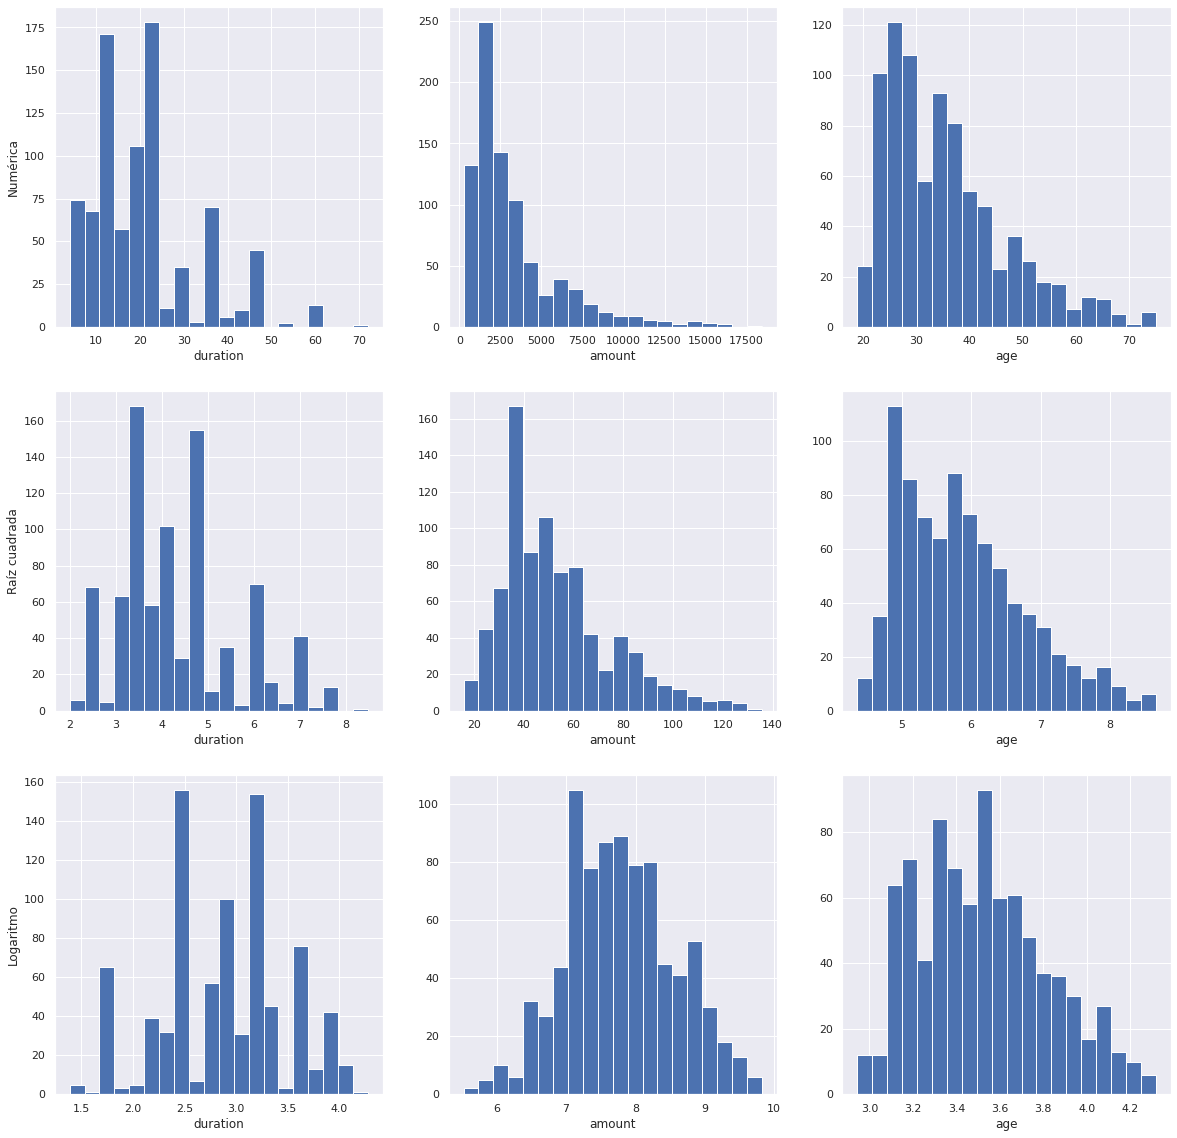

In [9]:
# Configurando el tamaño de las gráficas y su distribución
sns.set(rc={'figure.figsize':(20,20)}) 
fig, axes = plt.subplots(3, 3)   

# Gráficas de las variables cuantitativas
for k in range(0,3):  
  plt.subplot(3, 3, k+1) 

  Transf0 = Xtrain[variablesCuantitativas].iloc[:,k].to_numpy().reshape(-1, 1)
  plt.hist(Transf0, bins=20) 
  plt.xlabel(variablesCuantitativas[k])
  if k==0:
    plt.ylabel("Numérica")
  
  plt.subplot(3, 3, k+4)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=20)       
  plt.xlabel(variablesCuantitativas[k])
  if k==0:
    plt.ylabel("Raíz cuadrada")

  plt.subplot(3, 3, k+7)    
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2, bins=20)      
  plt.xlabel(variablesCuantitativas[k])
  if k==0:
    plt.ylabel("Logaritmo")

# Escalando las variables cuantitativas a un rango equiparable
pipelineCuantitativas = Pipeline(steps = [('imputacionCuantitativa', SimpleImputer(strategy='median')),('log', FunctionTransformer(np.log))])
columnasCuantitativas = variablesCuantitativas

#NOTA: Se agregará el pipeline en un solo transformer en el siguiente inciso, con el objetivo de controlar un solo transformer.


Inciso c - Aplicar One-Hot a las variables categóricas y binarias.

Nota: Las variables ordinales no se transforman.

In [10]:
# Aplicando One-Hot
pipelineCategoricas = Pipeline(steps = [('imputacionCategorica', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
columnasCategoricas = variablesCategoricas

pipelineBinarias = Pipeline(steps = [('imputacionBinaria', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
columnasBinarias = variablesBinarias


columnasTransformer = ColumnTransformer(transformers = [('numerical', pipelineCuantitativas, columnasCuantitativas),
                                                        ('categorical', pipelineCategoricas, columnasCategoricas),
                                                        ('binaries', pipelineBinarias, columnasBinarias),
                                                        ], remainder='passthrough')

###**¿Por qué una variable binaria requeriría una transformación One-Hot encoding ?**

No se requiere en una variable binaria ya que su naturaleza es 1 y 0, de tal forma que dicha transformación produce 2 variables en vez de 1 y además es redundante, se explica de la siguiente forma:

-Es redundante porque la variable tiene una forma similar al One-hot, al eliminar la columna de origen tampoco da ningún valor porque todos los valores se pueden deducir desde una sola columna.

-Se pueden multiplicar las columnas, en este caso particular al contar con 4 estaríamos produciendo 8 columnas, creando más dimensiones que consuman mayor tiempo, procesamiento y que tengan más complejidad al momento de crear los modelos y evaluarlos.


#**Ejercicio-4.**

Inciso a - Utilizar parámetros determinados para cada modelo

In [11]:
# Se establecen los modelos a procesar
def getModelos():
  modelos, nombres = list(), list()

  # Regresión logística
  modelos.append( LogisticRegression() )
  nombres.append('Regresión logística')

  # Arbol de decisión
  modelos.append(DecisionTreeClassifier())
  nombres.append('Arbol de decisión')


  # Bosque aleatorio
  modelos.append(RandomForestClassifier())
  nombres.append('Bosque aleatorio')

  return modelos, nombres

Inciso b - Definicion de cada una de las funciones de métricas

In [12]:
# Definiendo funciones para cada métrica

# Accuracy
def our_accuracy( yReal, yPred):
  vn, fp, fn, vp = confusion_matrix(yReal,yPred).ravel() # Valores de la matriz de confusión
  return ( vp + vn ) / ( vp + vn + fp + fn )

# Precision
def our_precision( yReal, yPred):
  vn, fp, fn, vp = confusion_matrix(yReal,yPred).ravel() # Valores de la matriz de confusión
  return vp / ( vp + fp )

# Recall
def our_recall( yReal, yPred):
  vn, fp, fn, vp = confusion_matrix(yReal,yPred).ravel() # Valores de la matriz de confusión
  return vp / ( vp + fn )

# f1-score
def our_f1Score( yReal, yPred):
  vn, fp, fn, vp = confusion_matrix(yReal,yPred).ravel() # Valores de la matriz de confusión
  return (2 * vp) / ( (2 * vp) + fp + fn )

# gmean
def our_gmean( yReal, yPred):
  vn, fp, fn, vp = confusion_matrix(yReal,yPred).ravel() # Valores de la matriz de confusión
  recall = vp / ( vp + fn )
  especificidad = vn / ( fp + vn )
  return np.sqrt( recall * especificidad )





Inciso c - Usar validación cruzada estratificada 5 particiones y 3 repeticiones

In [13]:
modelos, nombres = getModelos()
resultadosCVTrain = list()
resultadosCVTest = list()
resultadoRecallTrain = list()
resultadoRecallTest = list()

# Apagando los warnings, ya que hay variables que se les aplica OneHot que no aparecen en el set de validación
warnings.filterwarnings("ignore") 

mismetricas = {'accuracy':make_scorer(our_accuracy), 'precision':make_scorer(our_precision), 
'recall':make_scorer(our_recall), 'f1-score':make_scorer(our_f1Score), 'gmean':make_scorer(our_gmean) }

print( "Validación cruzada para datos de entrenamiento" )
for i in range(len(modelos)):
  cv = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  
  pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m',modelos[i])])
  resultadosCVTrain = cross_validate(pipeline, Xtrain, yTrain, scoring=mismetricas, cv= cv, return_train_score=True)

  print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nF1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosCVTrain['test_accuracy']),
                                                                          np.std(resultadosCVTrain['test_accuracy']), 
                                                                          np.mean(resultadosCVTrain['test_precision']),
                                                                          np.std(resultadosCVTrain['test_precision']),                                                                           
                                                                          np.mean(resultadosCVTrain['test_recall']),
                                                                          np.std(resultadosCVTrain['test_recall']),
                                                                          np.mean(resultadosCVTrain['test_f1-score']),
                                                                          np.std(resultadosCVTrain['test_f1-score']),                                                                           
                                                                          np.mean(resultadosCVTrain['test_gmean']),
                                                                          np.std(resultadosCVTrain['test_gmean']),  
                                                                          ))
  print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nF1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                            np.mean(resultadosCVTrain['train_accuracy']),
                                                                            np.std(resultadosCVTrain['train_accuracy']), 
                                                                            np.mean(resultadosCVTrain['train_precision']),
                                                                            np.std(resultadosCVTrain['train_precision']),                                                                           
                                                                            np.mean(resultadosCVTrain['train_recall']),
                                                                            np.std(resultadosCVTrain['train_recall']),
                                                                            np.mean(resultadosCVTrain['train_f1-score']),
                                                                            np.std(resultadosCVTrain['train_f1-score']),                                                                           
                                                                            np.mean(resultadosCVTrain['train_gmean']),
                                                                            np.std(resultadosCVTrain['train_gmean']),  
                                                                            ))
  
  resultadoRecallTrain.append(resultadosCVTrain['test_recall'])
  resultadoRecallTest.append(resultadosCVTrain['train_recall'])   



Validación cruzada para datos de entrenamiento
Regresión logística:
Accuracy: 0.758 (0.0255)
Precision: 0.795 (0.0210)
Recall: 0.883 (0.0337)
F1-Score: 0.836 (0.0183)
Gmean: 0.639 (0.0457)

Regresión logística:
Accuracy: 0.788 (0.0078)
Precision: 0.815 (0.0067)
Recall: 0.902 (0.0064)
F1-Score: 0.856 (0.0051)
Gmean: 0.687 (0.0141)

Arbol de decisión:
Accuracy: 0.687 (0.0254)
Precision: 0.785 (0.0165)
Recall: 0.760 (0.0311)
F1-Score: 0.772 (0.0212)
Gmean: 0.625 (0.0290)

Arbol de decisión:
Accuracy: 1.000 (0.0000)
Precision: 1.000 (0.0000)
Recall: 1.000 (0.0000)
F1-Score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Bosque aleatorio:
Accuracy: 0.754 (0.0180)
Precision: 0.778 (0.0128)
Recall: 0.908 (0.0244)
F1-Score: 0.838 (0.0126)
Gmean: 0.598 (0.0345)

Bosque aleatorio:
Accuracy: 1.000 (0.0000)
Precision: 1.000 (0.0000)
Recall: 1.000 (0.0000)
F1-Score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)



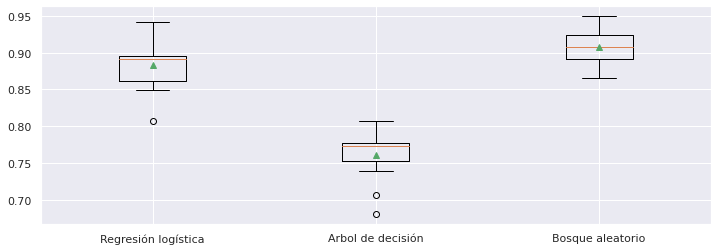

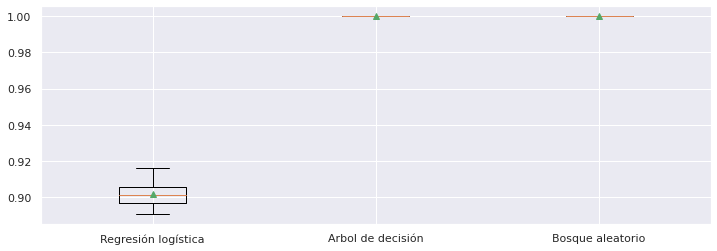

In [14]:
sns.set( rc={"figure.figsize": (12, 4)} )

# Imprimiendo la métrica recall en diagrama de caja - Datos de entrenamiento
plt.boxplot(resultadoRecallTrain, labels=nombres, showmeans=True)
plt.show()

# Imprimiendo la métrica recall en diagrama de caja - Datos de validación
plt.boxplot(resultadoRecallTest, labels=nombres, showmeans=True)
plt.show()

##**¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.**

Conforme el análisis de los resultados del Accuracy se puede determinar que el modelo de Regresión Logística sí logra aprender en el entrenamiento y también en la validación, sin embargo, su porcentaje de aprendizaje no es suficiente. Más adelante con la curva de aprendizaje se confirma que si bien el modelo está aprendiendo no convergen totalmente por lo que se considera subentrenado.

Respecto a los modelos de Árbol de decisión y de Bosque aleatorio, se puede concluir que ambos se encuentran sobreentrenados, ya que si bien durante el entrenamiento aprenden, ambos modelos resultan con un Accuracy bajo y al pasar a la validación se disparan hasta 1 como si ya hubieran aprendido cualquier comportamiento, lo que denota que están sobreentrenados.



Inciso e - Obtener curvas de aprendizaje

###### Definiendo las funciones para las curvas de aprendizaje

In [15]:

# Curva de aprendizaje
def our_LearningCurvePlot(train_sizes, train_scores, val_scores, yLabel):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficando curvas y desviación estandar

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel( yLabel )
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

# Curva de validación
def our_ValidationCurvePlot(train_scores, val_scores,param):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(param, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.plot(param, val_mean, color='red', marker='o', markersize=5, label='Validation')

    plt.title('Validation Curve with Random Forest')
    plt.xlabel('Valores Learning Curve')
    plt.ylabel('F1 Score')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

###### Inciso e.i - Curvas de aprendizaje

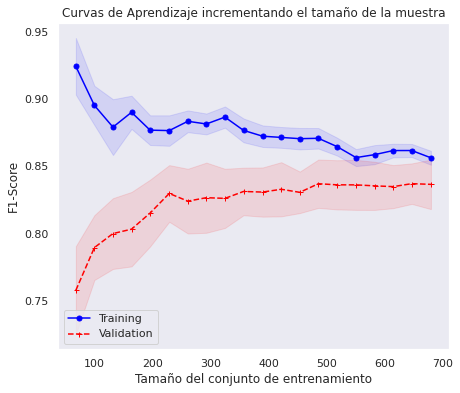

In [16]:
#Definiendo otro pipeline con el modelo de regresión
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m',modelos[0])])
# Definiendo delta
delta_train_sz = np.linspace(0.1, 1, 20 )
# Definiendo Kfold
kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10)  

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xtrain,
                                                        y = yTrain,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(our_f1Score),
                                                        n_jobs= -1)

our_LearningCurvePlot( tr_sizes, tr_scores, val_scores, 'F1-Score' )
  


###### Inciso e.ii - Curvas de validación

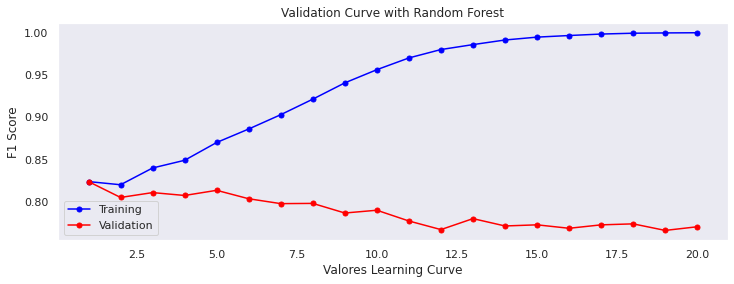

In [17]:
#Definiendo otro pipeline con el arbol
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m',modelos[1])])
# Definiendo max_depth
max_depth = np.linspace(1,20,20, dtype="int")
# Definiendo cv
cv = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  


train_scores,valid_scores = validation_curve(pipeline, 
                                             Xtrain, 
                                             yTrain,
                                             param_name="m__max_depth", 
                                             param_range=max_depth,
                                             cv=cv, 
                                             scoring=make_scorer(our_f1Score),
                                             n_jobs=-1)

our_ValidationCurvePlot(train_scores,valid_scores,max_depth)

###### Inciso e.iii - Curvas de aprendizaje - Bosque aleatorio

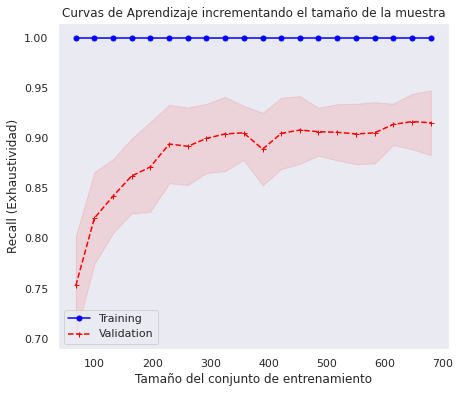

In [18]:
#Definiendo otro pipeline con el modelo de Arbol
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m',modelos[2])])
# Definiendo delta
delta_train_sz = np.linspace(0.1, 1, 20 )
# Definiendo Kfold
kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xtrain,
                                                        y = yTrain,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz,
                                                        scoring=make_scorer(our_recall),
                                                        n_jobs=-1)

our_LearningCurvePlot( tr_sizes, tr_scores, val_scores, 'Recall (Exhaustividad)' )

#**Ejercicio-5.**

Inciso a - Utilizar con Regresión logísta la forma GridSearchCV con F1-Score

In [19]:
modeloGSCV = LogisticRegression(max_iter=10000, random_state=10) 

#Definiendo otro pipeline con el modelo de Regresión logística
pipelineGS = Pipeline(steps=[('ct', columnasTransformer), ("model", modeloGSCV)])

# Definiendo Kfold
kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  

parametroC= [0.01, 0.1, 1, 10, 100, 1000]
ParametrosGR = [{'model__penalty': ['l1'], 'model__solver': [ 'saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC},
                  {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC},
                  {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC, 'model__l1_ratio': [0.5]},
                 ]

gridFinalLR=  GridSearchCV (estimator =  pipelineGS, 
                            param_grid = ParametrosGR,
                            scoring = make_scorer(our_f1Score),
                            cv = kfold, 
                            n_jobs = -1)


if calculateAll:
    gridFinalLR.fit(Xtrain, yTrain)
    best_scoreLR = gridFinalLR.best_score_
    best_paramLR = gridFinalLR.best_params_
else:
    best_scoreLR = 0.8387304367121202
    best_paramLR = {'model__C': 1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'saga'}

print("El mejor score es:", best_scoreLR)
print("El mejor parámetro es:", best_paramLR)

El mejor score es: 0.8407125988854199
El mejor parámetro es: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


##¿ Cuál es la utilidad de la métrica F1-Score ? 
Es utilizado para combinar las medidas de precision y recall esto con la finalidad de obtener una relación de ambas variables, entre más cerca de 1 el modelo es mejor,  para  que *no* exista una disparidad. 

Lo que podemos observar es que el score es de 0.84, hay una relación entre las  predicciones positivas (cuanto son realmente positivos) y los  casos reales positivos (cuanto realmente se predijeron positivos). 

Inciso b - Graficar la curva de aprendizaje

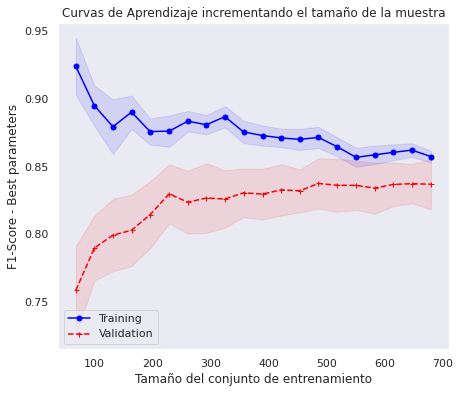

In [20]:
# Modificando el modelo para incluir los ajustes adecuados
modeloGSCV = LogisticRegression(C= best_paramLR["model__C"], solver=best_paramLR["model__solver"], penalty=best_paramLR["model__penalty"], class_weight=best_paramLR["model__class_weight"], max_iter=10000, random_state=10) 

# Definiendo Kfold
kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  


train_size_CV = np.linspace(0.1, 1.0, 20)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineGS ,    
                                                      X = Xtrain,
                                                      y = yTrain,
                                                      cv = kfold,
                                                      train_sizes = train_size_CV ,
                                                      random_state= 10,
                                                      scoring=make_scorer(our_f1Score),
                                                      n_jobs= 1)

our_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "F1-Score - Best parameters")

Inciso c - Utilizar para el Arbol de Decisión la forma GridSearchCV con la función de Precision

In [21]:
modeloGSCV = DecisionTreeClassifier() 

#Definiendo otro pipeline con el modelo de Regresión logística
pipelineGS = Pipeline(steps=[('ct', columnasTransformer), ("model", modeloGSCV)])

# Definiendo Kfold
kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  

ParametrosGR = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],  
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10], 
              'model__class_weight': ['balanced', None]}

ArbolFinal=  GridSearchCV (estimator =  pipelineGS, 
                            param_grid = ParametrosGR,
                            scoring = make_scorer(our_precision),
                            cv = kfold, 
                            n_jobs = -1)

if calculateAll:
    ArbolFinal.fit(Xtrain, yTrain)
    best_scoreDT = ArbolFinal.best_score_
    best_paramDT = ArbolFinal.best_params_
else:
    best_scoreDT = 0.8652338494406978
    best_paramDT = {'model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2}    

print("El mejor score es:", best_scoreDT)
print("El mejor parametro es:", best_paramDT)


El mejor score es: 0.8652338494406978
El mejor parametro es: {'model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2}


##¿ Cuál es la utilidad de la métrica Precisión ? 

Está métrica nos da la calidad de la predicción, esto nos auxilia para determinar de todas las predicciones positivas cuales son realmente son verdaderas positivas.

En este caso cuantos clientes prospectos ha otorgamiento de crédito de créditos son realmente correctos (buenos clientes). El score es de 86% 

Inciso d - Grafica la curva sobre la métrica "Precisión"

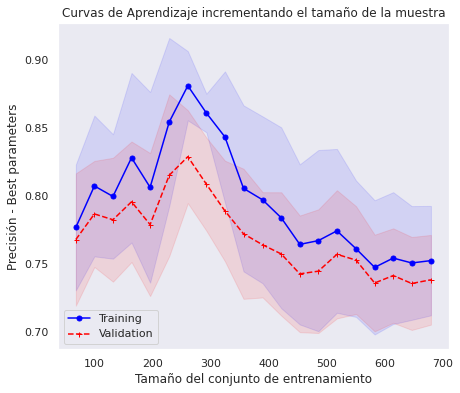

In [22]:
# Modificando el modelo para incluir los ajustes adecuados
modeloDT2 = DecisionTreeClassifier(ccp_alpha= best_paramDT.get('model__ccp_alpha'),
                                    criterion= best_paramDT.get('model__criterion'),
                                    max_depth= best_paramDT.get('model__max_depth'),
                                    min_samples_split= best_paramDT.get('model__min_samples_split')) 

# Definiendo Kfold
kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  

train_size_CV = np.linspace(0.1, 1.0, 20)

pipelineGS = Pipeline(steps=[("ct", columnasTransformer),("ConclusionDT", modeloDT2)])


tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineGS ,    
                                                    X = Xtrain,
                                                    y = yTrain,
                                                    cv = kfold,
                                                    train_sizes = train_size_CV ,
                                                    scoring=make_scorer(our_precision), 
                                                    n_jobs=-1) 

our_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Precisión - Best parameters") 

Inciso e - Relizar Bosque Aleatorio con los mejores hiperparámetros para GridSearchCV

In [23]:
modeloGSCV = RandomForestClassifier() 

#Definiendo otro pipeline con el modelo de Regresión logística
pipelineGS = Pipeline(steps=[('ct', columnasTransformer), ("model", modeloGSCV)])

# Definiendo Kfold
kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  

ParametrosGRRF = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],  
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10], 
              'model__class_weight': ['balanced', None]}

BosqueFinal=  GridSearchCV (estimator =  pipelineGS, 
                            param_grid = ParametrosGRRF,
                            scoring = make_scorer(our_recall),
                            cv = kfold, 
                            n_jobs=-1)

if calculateAll:
    BosqueFinal.fit(Xtrain, yTrain)
    best_scoreRF = BosqueFinal.best_score_
    best_paramRF = BosqueFinal.best_params_
else:
    best_scoreRF =1.0
    best_paramRF = {'model__ccp_alpha': 0.01, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}

# Impresión de resultados
print("best_score:", best_scoreRF)
print("best_param:", best_paramRF)


best_score: 1.0
best_param: {'model__ccp_alpha': 0.01, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}


##¿ Cuál es la utilidad de la métrica Recall ? 
Está métrica nos da la cantidad de casos reales que el modelo es capaz de identificar. Esto nos auxilia para determinar de todos los casos reales posibles cuantos estamos identificando.

En este caso cuantos buenos clientes de otorgamiento de crédito son identificados mediante la predicción. El Recall es de 100%



Inciso f - Obtener curvas de validación con los mejores hiperparámetros de "Recall" en el modelo de bosque aleatorio

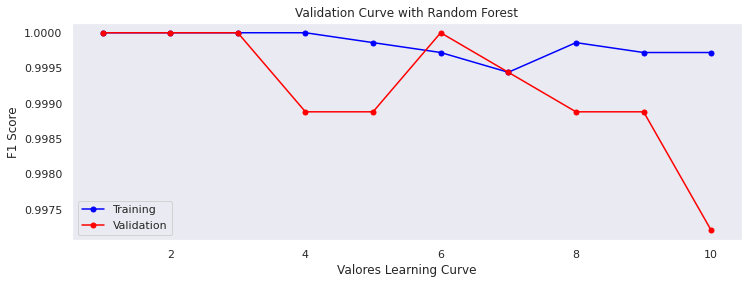

In [24]:
modeloGSCV2 = RandomForestClassifier(ccp_alpha= best_paramRF.get('model__ccp_alpha'),
                                    criterion= best_paramRF.get('model__criterion'),
                                    max_depth= best_paramRF.get('model__max_depth'),
                                    min_samples_split= best_paramRF.get('model__min_samples_split'),
                                    class_weight= best_paramRF.get('model__class_weight')) 

#Definiendo otro pipeline con el modelo de Random Forest
pipelineGS2 = Pipeline(steps=[("ct", columnasTransformer), ("model", modeloGSCV2 )])

# Definiendo Kfold
kfold = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 ) 

# Estableciendo max depth con 10 valores
max_depth = np.linspace(1, 10, 10, dtype="int")

#
train_scores,valid_scores = validation_curve(pipelineGS2, 
                                             Xtrain, 
                                             yTrain,
                                             param_name="model__max_depth", 
                                             param_range=max_depth,
                                             cv=cv, 
                                             scoring=make_scorer(our_recall),
                                             n_jobs=-1)


our_ValidationCurvePlot(train_scores,valid_scores,max_depth)

#**Ejercicio-6.**

Haciendo uso del conjunto de prueba, obtener los modelos finales utilizando el modelo de entreanmiento "aumentado":

Inciso a - Obten el modelo de regresión logística con los mejores parámetros de F1-SCORE

In [25]:
# Regresión logistica con parámetros de F1-SCORE

estimador_optimo = gridFinalLR.best_estimator_
predicciones = estimador_optimo.predict(Xtest)
print("Métrica final del conjunto de prueba:")
print("Métrica F1Score: %.3f \n" %(our_f1Score(yTest, predicciones)))


Métrica final del conjunto de prueba:
Métrica F1Score: 0.843 



## Conclusiones finales - Regresión logística con F1-Score
En esta sección ya tenemos todos los hiperparmetros optimizados, aquí ya utilizamos los datos de prueba.  

En los datos prueba Métrica F1Score: 0.843  
y los  datos entrenamiento  F1Score: 0.840

Para este módelo confirma que los datos de prueba y entrenamiento son consistente.

Inciso b - Obten el modelo de Arbol de Decisión con los mejores parámetros de Precision

Métrica final del conjunto de prueba:
Métrica Precision: 0.912 



[Text(0.5, 0.8333333333333334, 'X[5] <= 0.5\nentropy = 1.0\nsamples = 850\nvalue = [425.0, 425.0]'),
 Text(0.25, 0.5, 'X[0] <= 3.111\nentropy = 0.954\nsamples = 513\nvalue = [356.667, 213.571]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.998\nsamples = 299\nvalue = [161.667, 144.286]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.83\nsamples = 214\nvalue = [195.0, 69.286]'),
 Text(0.75, 0.5, 'X[35] <= 3.5\nentropy = 0.802\nsamples = 337\nvalue = [68.333, 211.429]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.917\nsamples = 182\nvalue = [53.333, 107.143]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.546\nsamples = 155\nvalue = [15.0, 104.286]')]

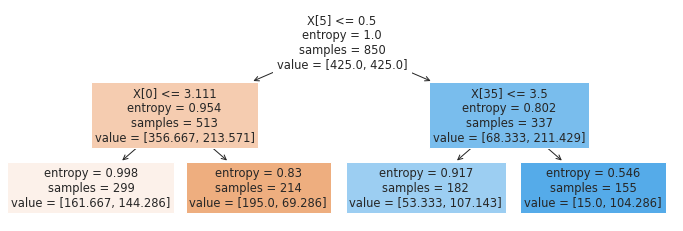

In [26]:
# Decision Tree con parámetros de Precision

estimador_optimo = ArbolFinal.best_estimator_
predicciones = estimador_optimo.predict(Xtest)
print("Métrica final del conjunto de prueba:")
print("Métrica Precision: %.3f \n" %(our_precision(yTest, predicciones)))

# Gráfico del arbol de decisión final
tree.plot_tree(estimador_optimo.named_steps["model"], filled = True)


##Conclusiones finales - Arbol de decisión con Precisión

En primer orden se tiene pocas ramas lo que significa que se pueden llegar a conclusiones de manera más rápida, los grados de entropía son relativamente alto, pero en los sub-nodos inferiores aún conserva impurezas.

La métrica precisión para este caso del árbol de decisión fue de: 0.912, esto quiere decir que el modelo tiene un 91% de aciertos sobre sus predicciones.

Al tener una entropía de 1 en el nodo inicial de estos datos son buenos para aprendizaje, después se fue diluyendo.


Inciso c - Obten el modelo de Bosque Aleatorio con los mejores parámetros de Recall

In [27]:
# RandomForest con parámetros de Recall

estimador_optimo = BosqueFinal.best_estimator_
predicciones = estimador_optimo.predict(Xtest)
print("Métrica final del conjunto de prueba:")
print("Métrica Recall: %.3f \n" %(our_recall(yTest, predicciones)))


Métrica final del conjunto de prueba:
Métrica Recall: 1.000 



##Conclusiones finales - Bosque Aleatorio con Recall

El resultado del bosque aleatoria con recall  fue de: 1, esto quiere decir que el modelo tiene un 100% de aciertos al identificar los buenos clientes a partir de sus predicciones.

---

**Como conclusiones finales:**

En este modelo de bosque aleatorio con Recall nos permite una efectividad al 100%, Lo que realmente nos ayuda este proceso es que de los créditos que se otorgan son correctamente colocados. 

Este modelo nos permite identificar los clientes que si se les debe otorgar un crédito y con ende aumentar la rentabilidad.

---

*Bibliográfia*:

-Geron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rdrd ed.). N.p.: O'Reilly.

-Jafari, R. (2022). Hands-On Data Preprocessing in Python. UK: Packt Publishing Ltd.

-Zeya, LT. (2021). "Essential Things You Need to Know About F1-Score", TowardsDataScience, Sitio web:
https://towardsdatascience.com/essential-things-you-need-to-know-about-f1-score-dbd973bf1a3#4e28




###**Fin de la Actividad de la semana 6.**